In [6]:
conda install ruptures

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Retrieving notices: ...working... done
Channels:
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
 - pytorch
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - ruptures


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    conda-24.11.3              |  py310hff52083_0         906 KB  conda-forge
    libgcc-14.2.0              |       h767d61c_2         828 KB  conda-forge
    libgcc-ng-14.2.0           |       h69a702a_2          52 KB  conda-forge
    libgomp-14.2.0             |       h767d61c_2         449 KB  conda-forge
    openssl-3.4.1              |       h7b32b05_0         2.8 MB  conda-forge
    ruptures-1.1.9             |  py310h91a95bf_2        

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from sklearn.metrics import mean_squared_error, r2_score
import ruptures as rpt

## Importing data

In [96]:
data = pd.read_csv("/kaggle/input/crypto-data-csv/crypto_data.csv")

In [97]:
data.iloc[: 61]

,Open_Time,Open,High,Low,Close,Volume,Close_Time,Quote_Asset_Volume,Number_of_Trades,Taker_Buy_Base_Volume,Taker_Buy_Quote_Volume,Ignore
0,2025-01-03 01:00:00,3449.22,3465.59,3442.62,3464.83,7084.8117,2025-01-03 01:59:59.999,2.447494e+07,64695,4036.1842,1.394607e+07,0
1,2025-01-03 02:00:00,3464.83,3477.03,3457.04,3457.95,9491.4632,2025-01-03 02:59:59.999,3.292275e+07,53028,6240.5190,2.164841e+07,0
2,2025-01-03 03:00:00,3457.96,3472.89,3456.02,3470.16,6813.8043,2025-01-03 03:59:59.999,2.359896e+07,38355,4179.0944,1.447244e+07,0
3,2025-01-03 04:00:00,3470.17,3470.94,3456.00,3458.38,4721.4520,2025-01-03 04:59:59.999,1.634948e+07,40012,2051.9729,7.105400e+06,0
4,2025-01-03 05:00:00,3458.39,3460.51,3444.81,3455.98,5278.9939,2025-01-03 05:59:59.999,1.822467e+07,50853,2329.2645,8.041955e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2025-01-05 09:00:00,3620.00,3623.40,3605.00,3609.46,6934.7639,2025-01-05 09:59:59.999,2.506503e+07,54853,3495.2434,1.263678e+07,0
57,2025-01-05 10:00:00,3609.49,3618.12,3603.33,3615.62,6390.2224,2025-01-05 10:59:59.999,2.308560e+07,71008,3531.6887,1.276020e+07,0
58,2025-01-05 11:00:00,3615.61,3620.96,3609.61,3613.47,5702.4335,2025-01-05 11:59:59.999,2.060439e+07,43079,3209.7752,1.159908e+07,0
59,2025-01-05 12:00:00,3613.46,3622.82,3605.00,3614.08,6026.4379,2025-01-05 12:59:59.999,2.178295e+07,46776,3425.8809,1.238507e+07,0


In [98]:
X = data[["Open", "High", "Low", "Volume", "Quote_Asset_Volume", "Number_of_Trades", "Taker_Buy_Base_Volume", "Taker_Buy_Quote_Volume"]]

In [99]:
y = data["Close"]

In [100]:
X.columns

Index(['Open', 'High', 'Low', 'Volume', 'Quote_Asset_Volume',
       'Number_of_Trades', 'Taker_Buy_Base_Volume', 'Taker_Buy_Quote_Volume'],
      dtype='object')

In [101]:
X.head()

,Open,High,Low,Volume,Quote_Asset_Volume,Number_of_Trades,Taker_Buy_Base_Volume,Taker_Buy_Quote_Volume
0,3449.22,3465.59,3442.62,7084.8117,2.447494e+07,64695,4036.1842,1.394607e+07
1,3464.83,3477.03,3457.04,9491.4632,3.292275e+07,53028,6240.5190,2.164841e+07
2,3457.96,3472.89,3456.02,6813.8043,2.359896e+07,38355,4179.0944,1.447244e+07
3,3470.17,3470.94,3456.00,4721.4520,1.634948e+07,40012,2051.9729,7.105400e+06
4,3458.39,3460.51,3444.81,5278.9939,1.822467e+07,50853,2329.2645,8.041955e+06


In [102]:

X.shape

(65573, 8)

In [103]:
scaler = MinMaxScaler()
# training the scaler on the training set
scaler.fit(X)
X = scaler.transform(X)

In [104]:
y

0        3464.83
1        3457.95
2        3470.16
3        3458.38
4        3455.98
          ...   
65568     285.00
65569     290.58
65570     290.00
65571     280.60
65572     265.00
Name: Close, Length: 65573, dtype: float64

In [105]:
# Create sequences
def create_sequences(input_X, input_y, seq_length):
    returned_X, returned_y = [], []
    for i in range(seq_length, len(data)):
        returned_X.append(input_X[i-seq_length:i, :])
        returned_y.append(input_y[i]) 
    return np.array(returned_X), np.array(returned_y)

In [106]:
seq_length = 60  # Use 60 time steps as input
X, y = create_sequences(X, y, seq_length)

In [107]:
# Split the data sequentially
split_index = int(0.8 * len(X))  # 80% training, 20% testing
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [108]:
X.shape

(65513, 60, 8)

In [109]:
y

array([3614.65, 3623.11, 3629.6 , ...,  290.  ,  280.6 ,  265.  ])

In [110]:
# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [111]:
np.min(y_test)

82.17

In [113]:
# Build the LSTM model
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="linear"))

In [114]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ (None, 60, 100)        │        43,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,851 (288.48 KB)

 Trainable params: 73,851 (288.48 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error")

In [117]:
# Train the model
model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/75
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 1555140.0000 - val_loss: 1752250.7500
Epoch 2/75
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 1557932.1250 - val_loss: 1773109.8750
Epoch 3/75
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 1550304.6250 - val_loss: 1776607.1250
Epoch 4/75
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 1551925.1250 - val_loss: 1805595.8750
Epoch 5/75
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 1551605.0000 - val_loss: 66894.6406
Epoch 6/75
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 741077.0625 - val_loss: 482744.0312
Epoch 7/75
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 515153.7500 - val_loss: 15686.5400
Epoch 8/75
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 269676.4688 - val_loss: 19942.8984
Epoch 9/75
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 145580.3125 - val_loss: 18938.5762
Epoch 10/75
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 103454.8516 - val_loss: 9156.7

## Evaluating the model:

In [135]:
# Make predictions
te_predictions = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, te_predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RMSE: 127.84160279337524


In [136]:
te_predictions

array([[148.97975],
       [148.74863],
       [148.6333 ],
       ...,
       [383.81702],
       [383.80432],
       [383.80594]], dtype=float32)

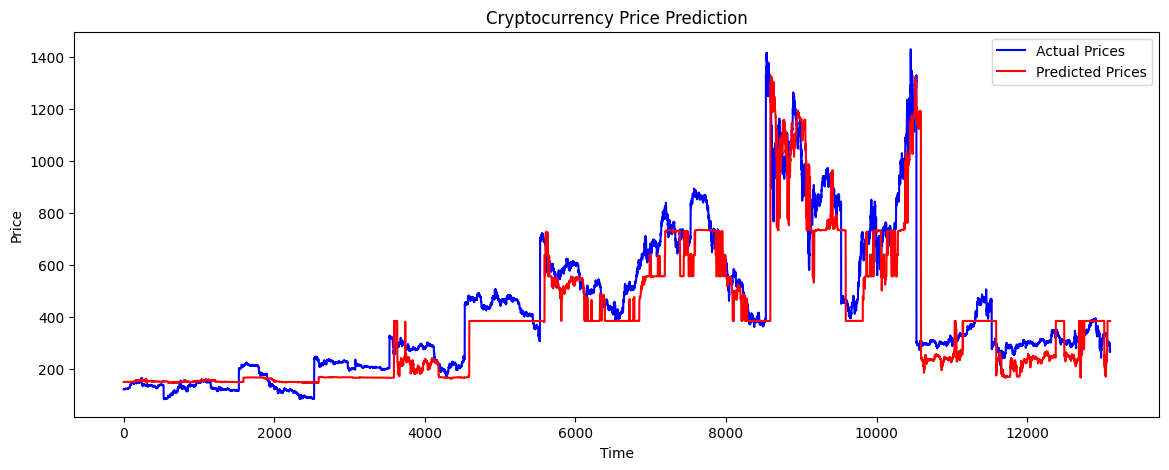

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test, color="blue", label="Actual Prices")
plt.plot(te_predictions, color="red", label="Predicted Prices")
plt.title("Cryptocurrency Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [138]:
# Make predictions
tr_predictions = model.predict(X_train)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, tr_predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

1638/1638 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
RMSE: 191.11676734382132


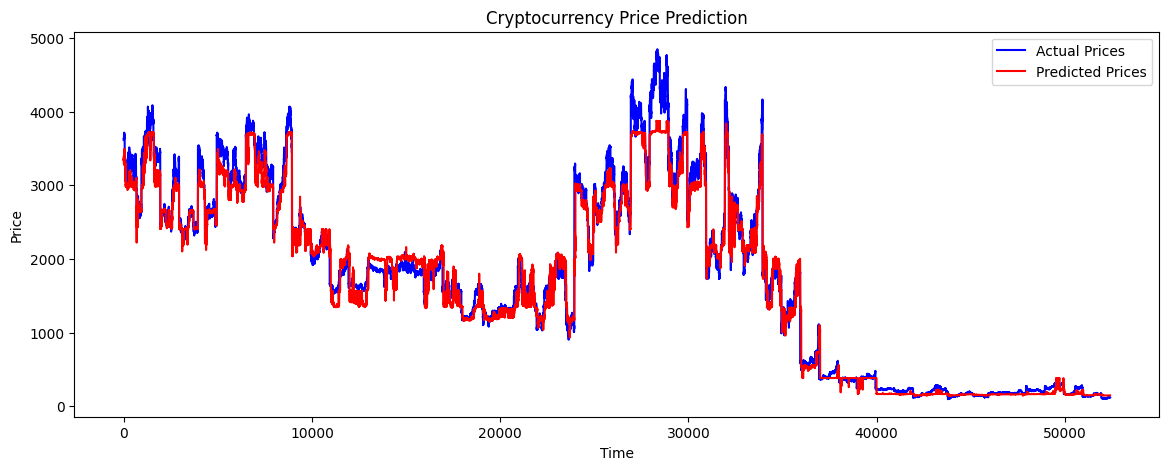

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_train, color="blue", label="Actual Prices")
plt.plot(tr_predictions, color="red", label="Predicted Prices")
plt.title("Cryptocurrency Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [123]:
model.save("model.h5")

In [141]:
# Evaluate the model
from sklearn.metrics import r2_score

tr_r2 = r2_score(y_test, te_predictions)

print("Train R² Score:", tr_r2)

te_r2 = r2_score(y_train, tr_predictions)

print("Test R² Score:", te_r2)

Train R² Score: 0.7773013101671344
Test R² Score: 0.9762471342620459


## After using the CPD algorithm:

In [8]:
data = pd.read_csv("/kaggle/input/crypto-data-csv/crypto_data.csv")

In [9]:
X = data[["Open", "High", "Low", "Volume", "Quote_Asset_Volume", "Number_of_Trades", "Taker_Buy_Base_Volume", "Taker_Buy_Quote_Volume"]]

In [10]:
y = data["Close"]

### Scaling Data

In [11]:
scaler = MinMaxScaler()
# training the scaler on the training set
scaler.fit(X)
X = scaler.transform(X)

### 1. Detect change points using the PELT algorithm

In [12]:
algo = rpt.Pelt(model="l2", min_size=10, jump=5).fit(X)

In [13]:
change_points = algo.predict(pen=10)  # Tune penalty to adjust sensitivity
print("Detected change points:", change_points)

Detected change points: [735, 1000, 2000, 2630, 3000, 4000, 4345, 5000, 8000, 8535, 9000, 11000, 18000, 20790, 23560, 24000, 24720, 25000, 27000, 27765, 28000, 29000, 31000, 32000, 32210, 32390, 33820, 34000, 35000, 36000, 40000, 57000, 61000, 63000, 65573]


### 2. Select the most recent change point

In [14]:
if change_points:
    last_cp = change_points[-4]
else:
    last_cp = 0  # No change point detected, train on full data

In [15]:
last_cp

57000

### 3. Prepare training data after the last change point to feed to the LSTM

In [16]:
# Create sequences
def create_sequences(input_X, input_y, seq_length = 60):
    # Convert Pandas objects to NumPy arrays
    input_X = np.asarray(input_X)
    input_y = np.asarray(input_y)

    # Ensure input_X and input_y have the same length
    max_len = min(len(input_X), len(input_y))

    # Ensure valid sequence length
    if seq_length >= max_len:
        raise ValueError(f"Sequence length ({seq_length}) must be smaller than the dataset size ({max_len}).")

    # Use NumPy array slicing for efficiency
    X_sequences = np.array([input_X[i - seq_length:i] for i in range(seq_length, max_len)])
    y_sequences = np.array([input_y[i] for i in range(seq_length, max_len)])

    return X_sequences, y_sequences

In [17]:
X = X[last_cp:]  # Use only recent data
y = y.iloc[last_cp:]

In [18]:
y.reset_index(drop=True, inplace=True)
y.shape

(8573,)

In [19]:
X.shape
y.shape

(8573,)

In [20]:
X, y = create_sequences(X, y)

### 4. Splitting the data:

In [21]:
split_index = int(0.8 * len(X))  # 80% training, 20% testing
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

### 5. Building the Model:

In [22]:
# Build the LSTM model
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="linear"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error")

### 6. Training the Model:

In [24]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 399220.4375
Epoch 2/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 300287.0938
Epoch 3/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 214424.2656
Epoch 4/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 158658.1875
Epoch 5/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 120575.0391
Epoch 6/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 92827.6094
Epoch 7/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 78175.6484
Epoch 8/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 71112.8984
Epoch 9/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 64868.3633
Epoch 10/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 61663.2812
Epoch 11/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 59340.0312
Epoch 12/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 60547.2148
Epoch 13/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 60266.4141
Epoch 14/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 59771.5

### 7. Evaluating the Model:

In [25]:
tr_predictions = model.predict(X_train)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, tr_predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RMSE: 239.92553659487942


In [26]:
# Make predictions
te_predictions = model.predict(X_test)

mse = mean_squared_error(y_test, te_predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE: 304.083785536554


In [27]:
# Evaluate the model
from sklearn.metrics import r2_score
tr_r2 = r2_score(y_train, tr_predictions)

print("Train R² Score:", tr_r2)

te_r2 = r2_score(y_test, te_predictions)

print("Test R² Score:", te_r2)

Train R² Score: -1.0190459809988894e-05
Test R² Score: -36.82245051446891
